# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


To data was read into the workbook using the following code.

In [4]:
pwd

'C:\\Users\\Paula\\Documents\\EPA1361 Model-Based decision-making\\epa1361_open-master\\Week 3-4 - vulnerability analysis\\data'

In [5]:
import os
os.chdir('C:/Users/Paula/Documents/EPA1361 Model-Based decision-making/epa1361_open-master/Week 3-4 - vulnerability analysis/data')

In [6]:
import pandas as pd
 
data = pd.read_csv('Bryant_et_al_2010.csv',
                             index_col=False)
data.to_numpy()
data.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [7]:
x = data.iloc[:, 2:11]
x.head()

,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000


In [8]:
y = data.iloc[:,15]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Greater than 90%, dtype: int64

We apply the PRIM algorithm to the experiments and outcomes.

In [9]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

In [10]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


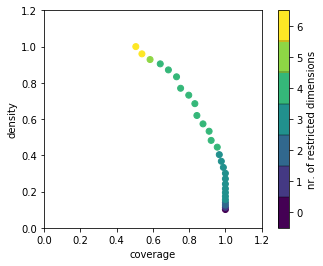

In [11]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

To use an interactive tool for insection inspect_tradeoff() and the altair library can be used. Unfortunately, I was not able to successfully install one of the packages I cannot use the interacive tool.

In [12]:
import altair as alt
box1.inspect_tradeoff()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


#### Let's inspect a box of interest
A box can be inspected via the values and via the graph. Both return the same outputs.

coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



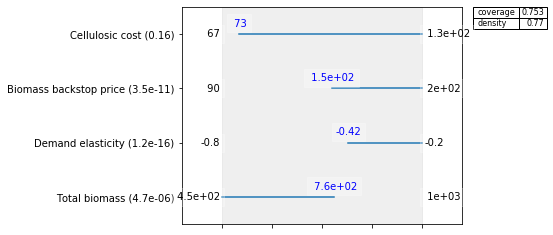

In [13]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

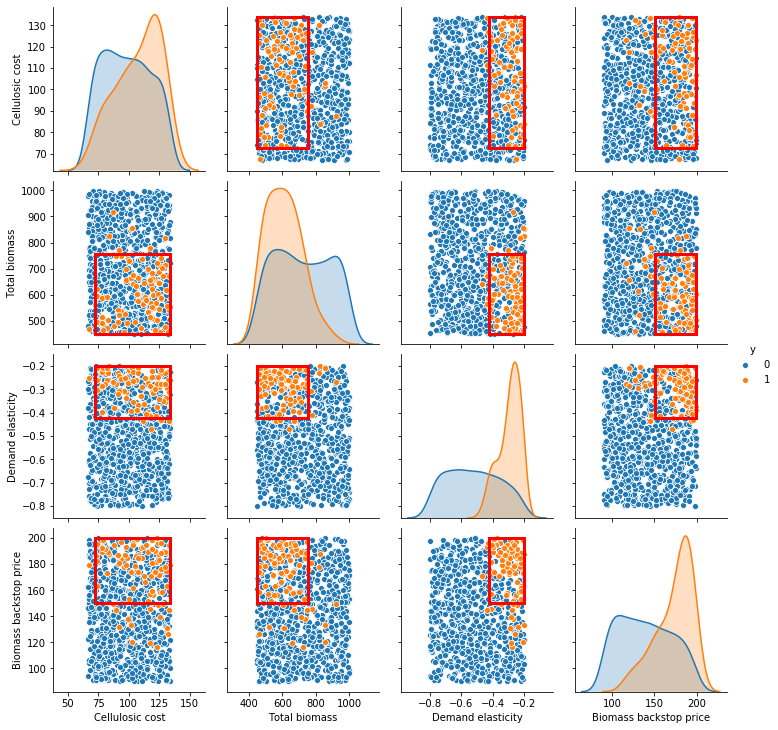

In [14]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

The scatter plot shows the outcomes of interest plotted with two uncertainties against each other.

In [15]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 795 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3469387755102041, returning dump box


In [16]:
prim_alg.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.752809,0.770115,0.098639,4
box 2,0.247191,0.027673,0.901361,0


In [17]:
prim_alg.boxes_to_dataframe()

box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997

In [18]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()

In [19]:
cart_alg.show_tree

<bound method CART.show_tree of <ema_workbench.analysis.cart.CART object at 0x00000157216B4588>>

In [20]:
cart_alg.stats_to_dataframe()

,coverage,density,res dim,mass
box 1,0.011236,0.021739,2,0.052154
box 2,0.000000,0.000000,2,0.546485
box 3,0.000000,0.000000,3,0.103175
box 4,0.044944,0.090909,3,0.049887
box 5,0.224719,0.434783,2,0.052154
box 6,0.112360,0.227273,3,0.049887
box 7,0.000000,0.000000,3,0.051020
box 8,0.606742,0.642857,2,0.095238


In [21]:
cart_alg.boxes_to_dataframe()

box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   
Cellulosic cost         67.0  133.699997  67.000000  133.699997  67.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand elasticity        -0.316500   -0.439000   -0.316500   -0.439   
Biomass backstop price  170.750000   90.000000  170.750000  170.750   
Cellulosic cost         109.200001  109.200001  133.699997   67.000   

                                      box 6                  box 7  \
                               max      min         max        min   
Cellulosic yield         99.900002  80.0000   89.049999  89.049999   
Demand elasticity        -0.316500  -0.3165   -0.202000  -0.316500   
Biomass backstop price  199.600006  90.0000  148.300003  90.000000   
Cellulosic cost         133.699997  67.0000  133.699997  67.000000   

                                         box 8              
                               max         min         max  
Cellulosic yield         99.900002   80.000000   99.900002  
Demand elasticity        -0.202000   -0.316500   -0.202000  
Biomass backstop price  148.300003  148.300003  199.600006  
Cellulosic cost         133.699997   67.000000  133.699997

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [22]:
data_Rozenberg = pd.read_csv('Rozenberg_et_al_2014.csv')
data_Rozenberg.to_numpy()
data_Rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [23]:
x_Rozenberg = data_Rozenberg.iloc[:,0:7]
x_Rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets
0,0,2,0,0,0,0,0
1,0,2,0,0,0,0,1
2,0,2,0,0,0,1,0
3,0,2,0,0,0,1,1
4,0,2,0,0,1,0,0


In [24]:
x_Rozenberg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   inequalities     286 non-null    int64
 1   convergence      286 non-null    int64
 2   population       286 non-null    int64
 3   behaviors        286 non-null    int64
 4   technologies     286 non-null    int64
 5   fossils          286 non-null    int64
 6   capital markets  286 non-null    int64
dtypes: int64(7)
memory usage: 15.8 KB


We will apply the PRIM algorithm the all SSP, thus we need to create an array for each of them.

In [25]:
y_SSP1 = data_Rozenberg.iloc[:,7]
y_SSP2 = data_Rozenberg.iloc[:,8]
y_SSP3 = data_Rozenberg.iloc[:,9]
y_SSP4 = data_Rozenberg.iloc[:,10]
y_SSP5 = data_Rozenberg.iloc[:,11]

y_SSP1.head()

0    0
1    0
2    0
3    0
4    0
Name: SSP1, dtype: int64

In [26]:
y_SSP1 = y_SSP1.values
y_SSP2 = y_SSP2.values
y_SSP3 = y_SSP3.values
y_SSP4 = y_SSP4.values
y_SSP5 = y_SSP5.values

#### SSP1

In [27]:
prim_alg = prim.Prim(x_Rozenberg, y_SSP1, threshold=0.65)
boxSSP1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


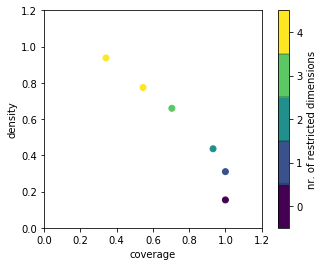

In [28]:
boxSSP1.show_tradeoff()
plt.show()

Choose the box that will return the wanted result.

coverage    0.704545
density     0.659574
id                 3
mass        0.164336
mean        0.659574
res_dim            3
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
population     0.0  1.0   [-1.0, 0.005972420192480504]
behaviors      1.0  1.0  [1.469768735781625e-06, -1.0]
inequalities   1.0  1.0   [0.000977219127931685, -1.0]



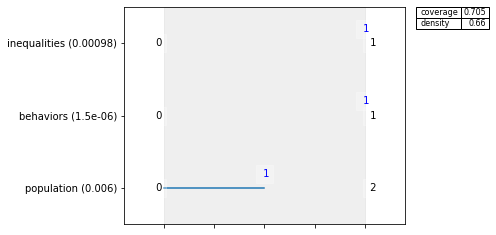

In [29]:
boxSSP1.inspect(3)
boxSSP1.inspect(3, style ='graph')
plt.show()

#### SSP2

In [30]:
prim_alg = prim.Prim(x_Rozenberg, y_SSP2, threshold=0.40)
boxSSP2 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


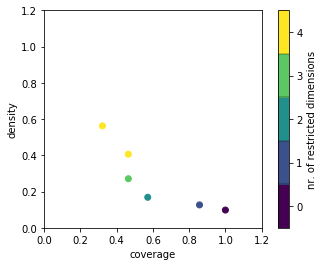

In [31]:
boxSSP2.show_tradeoff()
plt.show()

coverage    0.464286
density      0.40625
id                 4
mass        0.111888
mean         0.40625
res_dim            4
Name: 4, dtype: object

             box 4                                   
               min  max                     qp values
behaviors      0.0  0.0  [-1.0, 0.007952250065964422]
convergence    0.0  1.0   [-1.0, 0.06752777747436578]
population     0.0  1.0   [-1.0, 0.06752777747436578]
inequalities   1.0  1.0   [0.02290405000582007, -1.0]



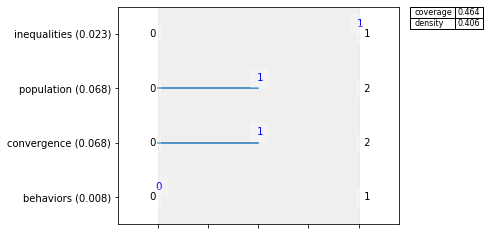

In [32]:
boxSSP2.inspect(4)
boxSSP2.inspect(4, style ='graph')
plt.show()

#### SSP3

In [33]:
prim_alg = prim.Prim(x_Rozenberg, y_SSP3, threshold=0.65)
boxSSP3 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4


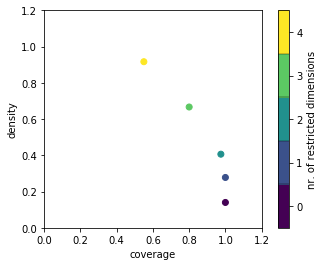

In [34]:
boxSSP3.show_tradeoff()
plt.show()

coverage         0.8
density     0.666667
id                 3
mass        0.167832
mean        0.666667
res_dim            3
Name: 3, dtype: object

             box 3                                     
               min  max                       qp values
behaviors      0.0  0.0   [-1.0, 3.130396509639097e-06]
inequalities   0.0  0.0  [-1.0, 0.00023925686322256464]
population     1.0  2.0    [0.002914918307607955, -1.0]



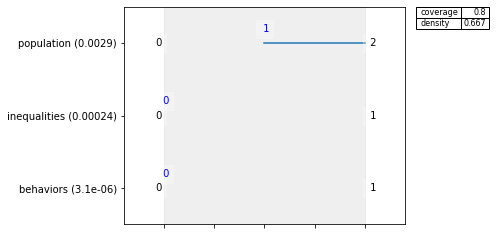

In [35]:
boxSSP3.inspect(3)
boxSSP3.inspect(3, style ='graph')
plt.show()

#### SSP4

In [36]:
prim_alg = prim.Prim(x_Rozenberg, y_SSP4, threshold=0.90)
boxSSP4 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


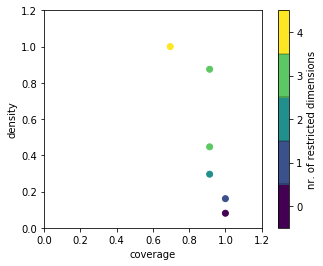

In [37]:
boxSSP4.show_tradeoff()
plt.show()

coverage     0.913043
density         0.875
id                  4
mass        0.0839161
mean            0.875
res_dim             3
Name: 4, dtype: object

             box 4                                     
               min  max                       qp values
convergence    0.0  0.0  [-1.0, 5.8154822275538926e-09]
inequalities   0.0  0.0  [-1.0, 1.1582287777091569e-05]
behaviors      1.0  1.0   [6.336598320679067e-05, -1.0]



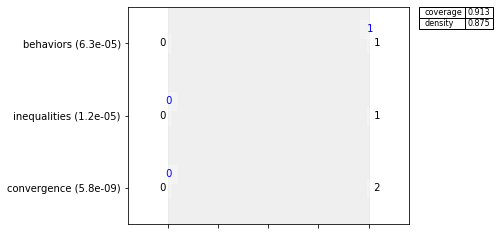

In [38]:
boxSSP4.inspect(4)
boxSSP4.inspect(4, style ='graph')
plt.show()

#### SSP 5

In [39]:
prim_alg = prim.Prim(x_Rozenberg, y_SSP5, threshold=0.45)
boxSSP5 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, density: 0.4583333333333333 restricted_dimensions: 3


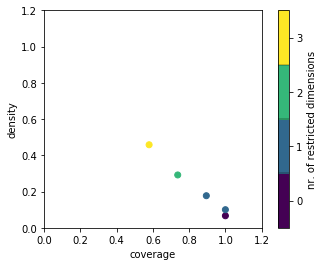

In [40]:
boxSSP5.show_tradeoff()
plt.show()

coverage     0.578947
density      0.458333
id                  4
mass        0.0839161
mean         0.458333
res_dim             3
Name: 4, dtype: object

             box 4                                   
               min  max                     qp values
behaviors      0.0  0.0   [-1.0, 0.06193796026800955]
convergence    2.0  2.0  [0.001616972965573594, -1.0]
inequalities   1.0  1.0  [0.011131987844474327, -1.0]



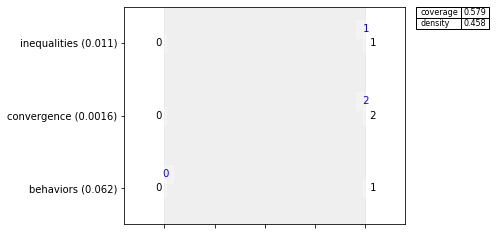

In [41]:
boxSSP5.inspect(4)
boxSSP5.inspect(4, style ='graph')
plt.show()

Could not reproduce SSP1. Did change anything else for the experiments than the threshold?

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [75]:
from ema_workbench import load_results
data_Hamarat = 'Hamarat et al 2013.gz'

Load the results and only select the outomes of interest where the end state for 'fraction_renewables' is lower than the initial value.

In [76]:
experiments, outcomes = load_results(data_Hamarat)

[MainProcess/INFO] results loaded succesfully from C:\Users\Paula\Documents\EPA1361 Model-Based decision-making\epa1361_open-master\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [77]:
#only include the experiments of interest: 'fraction renewables' is lower than the initial value
data = outcomes['fraction renewables']

In [78]:
data.shape

(5000, 641)

In [79]:
import numpy as np
y_Hamarat = data[:,-1] < data[:,0]
y_Hamarat.shape

(5000,)

In [80]:
x_Hamarat = experiments
x_Hamarat.head()

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year,model,policy
0,1,2,3,2,5,1,1,2,1,2,...,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007,energy,no policy
1,2,3,2,1,4,2,1,1,3,2,...,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794,energy,no policy
2,1,3,1,1,3,6,4,2,4,1,...,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390,energy,no policy
3,2,2,3,2,1,5,1,2,2,1,...,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062,energy,no policy
4,1,2,3,3,4,5,1,2,2,1,...,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439,energy,no policy


In [81]:
y_Hamarat = y_Hamarat.astype(int)

In [82]:
y_Hamarat.shape

(5000,)

In [83]:
prim_alg = prim.Prim(x_Hamarat, y_Hamarat, threshold = 0.73)
boxHamarat = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


The results of the Prim shows that the density is high but the coverage is very low. This is due to the fact that it is categoricla data and not continious data.The inspection of the trade_off shows that only under 0 restricted dimensions a high density and coverage can be achieved.

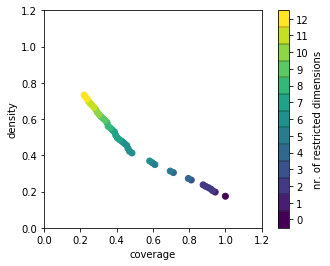

In [84]:
boxHamarat.show_tradeoff()
plt.show()

SWITCH economic growth [1, 2, 5, 3, 4, 6]
SWITCH electrification rate [1, 2, 4, 5, 3, 6]


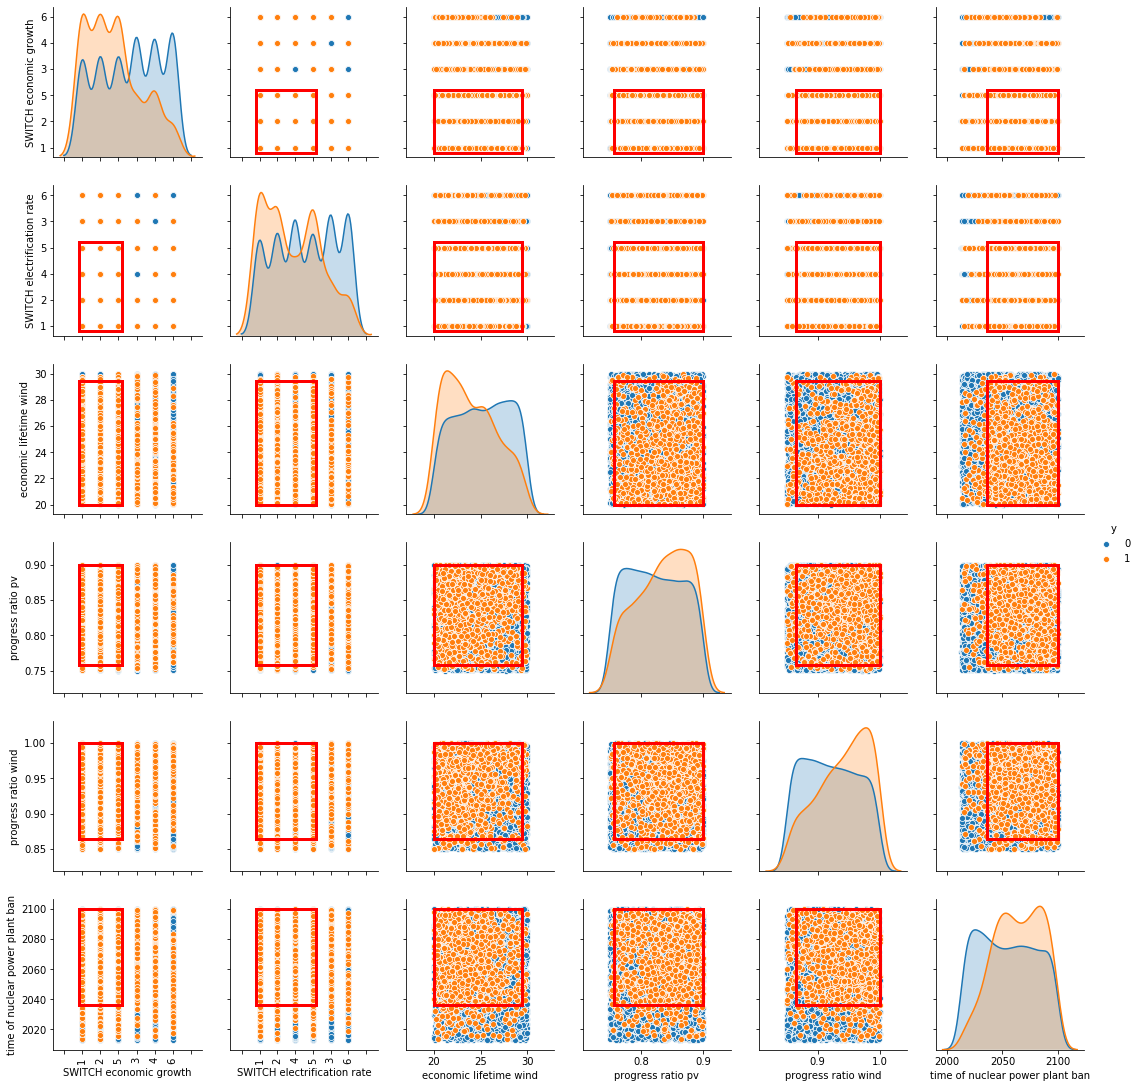

In [85]:
boxHamarat.select(15)
fig = boxHamarat.show_pairs_scatter()
plt.show()

The scatterplot shows that outcomes of interest are difficult to locate.

To achieve better results we need to apply pca_preprocessing which turns the axis of uncertainties with continous variables and exclude categorical data for now.

### PCA Preprocessing

In [86]:
from ema_workbench.analysis.prim import pca_preprocess

In [87]:
x_Hamarat_numeric = x_Hamarat.select_dtypes(exclude = pd.CategoricalDtype) 
x_Hamarat_numeric.head()

,demand fuel price elasticity factor,economic lifetime biomass,economic lifetime coal,economic lifetime gas,economic lifetime hydro,economic lifetime igcc,economic lifetime ngcc,economic lifetime nuclear,economic lifetime pv,economic lifetime wind,...,progress ratio pv,progress ratio wind,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year
0,0.077496,37.543963,36.876307,33.711768,51.592439,32.158807,37.744264,54.640947,26.334196,28.858116,...,0.847988,0.976581,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007
1,0.255003,48.957393,35.530551,26.475980,57.999097,46.150758,26.314175,63.457026,25.888506,28.116622,...,0.815255,0.852252,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794
2,0.039817,32.209231,37.456813,28.471929,56.468963,38.360928,37.112850,56.335537,24.085622,22.395718,...,0.761776,0.953124,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390
3,0.422542,30.254900,47.876728,38.764934,57.692945,33.050055,27.912008,63.611705,23.604295,25.174630,...,0.840963,0.941029,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062
4,0.346835,37.171874,47.391927,25.172522,63.647553,37.471323,27.936268,59.440919,23.076289,24.041438,...,0.805999,0.859009,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439


In [88]:
x_Hamarat_categoric = x_Hamarat.select_dtypes(include = pd.CategoricalDtype)
x_Hamarat_categoric.head()

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,SWITCH storage for intermittent supply,SWTICH preference carbon curve,model,policy
0,1,2,3,2,5,1,1,2,1,2,4,2,energy,no policy
1,2,3,2,1,4,2,1,1,3,2,3,2,energy,no policy
2,1,3,1,1,3,6,4,2,4,1,4,2,energy,no policy
3,2,2,3,2,1,5,1,2,2,1,6,2,energy,no policy
4,1,2,3,3,4,5,1,2,2,1,6,2,energy,no policy


In [89]:
rotated_experiments, rotated_matrix = prim.pca_preprocess(x_Hamarat_numeric, y_Hamarat)

C:\Users\Paula\Anaconda3\lib\site-packages\ema_workbench\analysis\prim_util.py:177: RuntimeWarning: invalid value encountered in sqrt
  np.linalg.norm(eigen_vectors[:, i]) * np.sqrt(eigen_vals[i])


In [90]:
rotated_x = pd.concat([rotated_experiments,x_Hamarat_categoric], axis =1)

In [91]:
prim_alg = prim.Prim(rotated_x, y_Hamarat, threshold = 0.63)
boxrotated = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.6304985337243402, mass: 0.0682, coverage: 0.2468427095292767, density: 0.6304985337243402 restricted_dimensions: 22


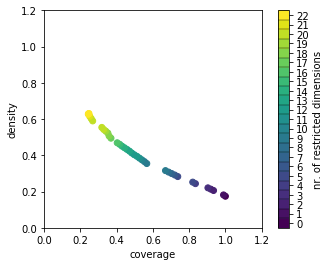

In [92]:
boxrotated.show_tradeoff()
plt.show()

SWITCH economic growth [1, 2, 5, 3, 4, 6]
SWITCH electrification rate [1, 2, 4, 5, 3, 6]


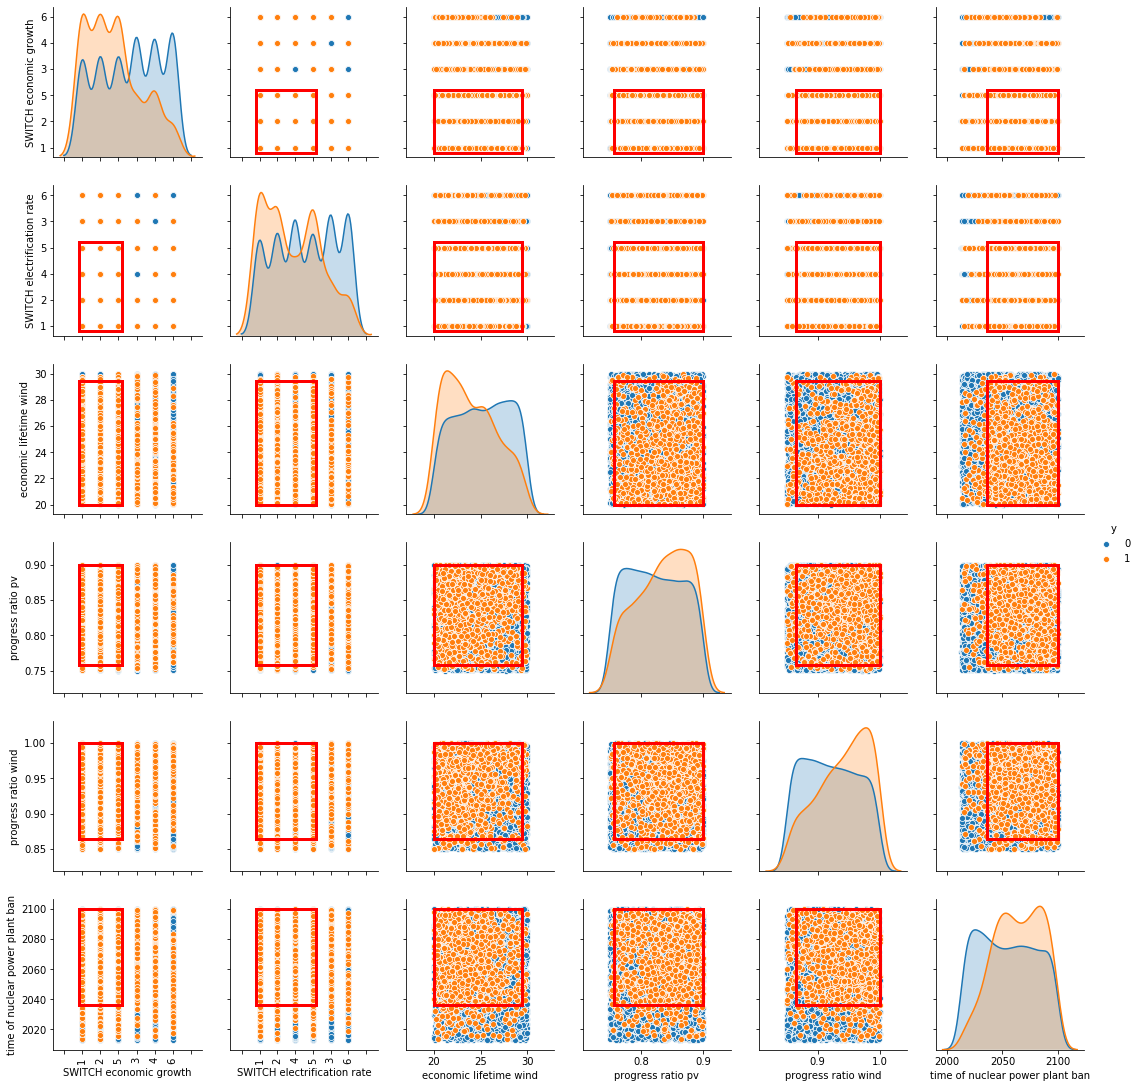

In [93]:
boxHamarat.select(15)
fig = boxHamarat.show_pairs_scatter()
plt.show()

Now, the outcomes of interest are easier to interpret than before. But, the difference is not that big so I wonder, whether we did everything correct. More dimensions than before were identified.